In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.4510,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.2060,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.9920,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.4310,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.1450,0.000000,0.0753,0.6470,155.117,179413,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.166,0.0551,9,-19.494,0,0.0520,0.9760,0.635000,0.1190,0.1430,176.616,206520,3,0
191,0.862,0.6240,3,-11.630,1,0.0565,0.0192,0.000153,0.0465,0.8820,124.896,254240,4,0
192,0.499,0.3510,9,-11.509,0,0.0448,0.9510,0.000099,0.1180,0.6160,90.664,235947,4,0
193,0.574,0.7290,10,-5.838,0,0.0965,0.0406,0.000004,0.1940,0.4130,110.547,190239,5,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      195 non-null    float64
 1   energy            195 non-null    float64
 2   key               195 non-null    int64  
 3   loudness          195 non-null    float64
 4   mode              195 non-null    int64  
 5   speechiness       195 non-null    float64
 6   acousticness      195 non-null    float64
 7   instrumentalness  195 non-null    float64
 8   liveness          195 non-null    float64
 9   valence           195 non-null    float64
 10  tempo             195 non-null    float64
 11  duration_ms       195 non-null    int64  
 12  time_signature    195 non-null    int64  
 13  liked             195 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 21.5 KB


In [6]:
df.isna().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
liked               0
dtype: int64

In [8]:
df[df.duplicated()]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked


In [16]:
df.corr().style.background_gradient(cmap='Blues')

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
danceability,1.000000,0.137188,-0.063906,0.455078,0.043759,0.388596,-0.234176,-0.807053,-0.137069,0.612344,0.223522,-0.232621,0.317096,0.569425
energy,0.137188,1.000000,0.130251,0.813567,-0.068308,0.122825,-0.772583,-0.241444,0.166508,0.319409,0.214905,-0.134527,0.123942,0.176179
key,-0.063906,0.130251,1.000000,0.046865,-0.103371,-0.093395,-0.066844,0.003597,-0.039622,0.033336,0.097240,0.054522,0.048344,-0.044406
loudness,0.455078,0.813567,0.046865,1.000000,-0.041678,0.279710,-0.664989,-0.538266,0.078093,0.363532,0.274462,-0.206334,0.207806,0.410774
mode,0.043759,-0.068308,-0.103371,-0.041678,1.000000,0.031953,-0.025709,0.075442,-0.048661,0.033409,-0.036270,-0.060965,-0.110739,0.023747
speechiness,0.388596,0.122825,-0.093395,0.279710,0.031953,1.000000,-0.079710,-0.343242,-0.006665,0.180708,0.313918,-0.388397,0.140325,0.591505
acousticness,-0.234176,-0.772583,-0.066844,-0.664989,-0.025709,-0.079710,1.000000,0.294320,-0.140988,-0.313806,-0.255097,0.138793,-0.142177,-0.179375
instrumentalness,-0.807053,-0.241444,0.003597,-0.538266,0.075442,-0.343242,0.294320,1.000000,0.055730,-0.572224,-0.299493,0.249683,-0.375199,-0.569440
liveness,-0.137069,0.166508,-0.039622,0.078093,-0.048661,-0.006665,-0.140988,0.055730,1.000000,-0.013004,-0.010555,-0.143966,-0.135409,-0.009797
valence,0.612344,0.319409,0.033336,0.363532,0.033409,0.180708,-0.313806,-0.572224,-0.013004,1.000000,0.218017,-0.114842,0.201111,0.268653


In [22]:
liked = df['liked'] == 1
disliked = df['liked'] == 0
liked_songs = df[liked]
disliked_songs = df[disliked]

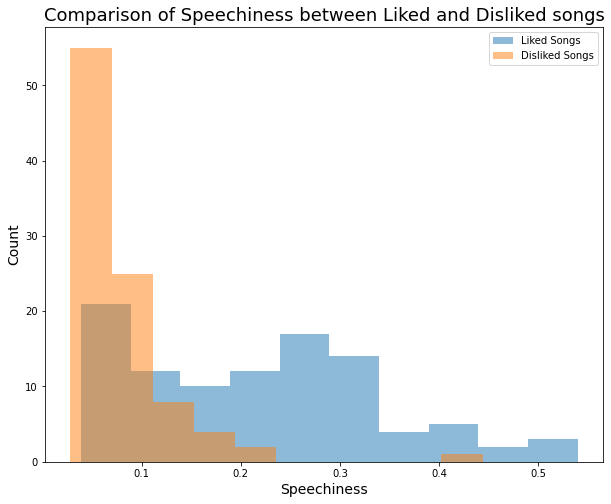

In [23]:
plt.figure(figsize=(10,8))
plt.hist(liked_songs['speechiness'], alpha=0.5, label='Liked Songs')
plt.hist(disliked_songs['speechiness'], alpha=0.5, label='Disliked Songs')

plt.xlabel('Speechiness', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Comparison of Speechiness between Liked and Disliked songs', fontsize=18)
plt.legend()

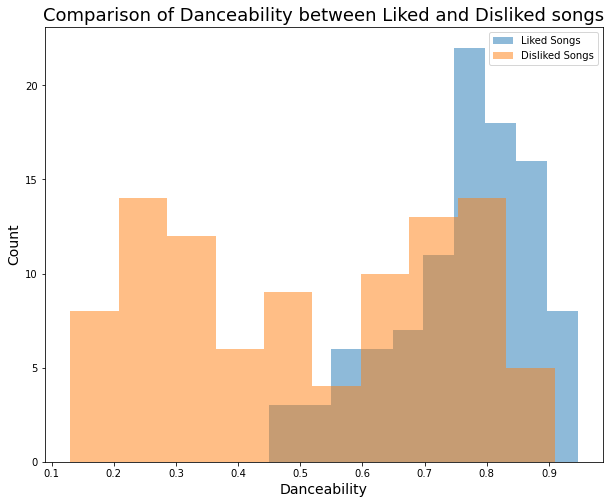

In [24]:
plt.figure(figsize=(10,8))
plt.hist(liked_songs['danceability'], alpha=0.5, label='Liked Songs')
plt.hist(disliked_songs['danceability'], alpha=0.5, label='Disliked Songs')

plt.xlabel('Danceability', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Comparison of Danceability between Liked and Disliked songs', fontsize=18)
plt.legend()

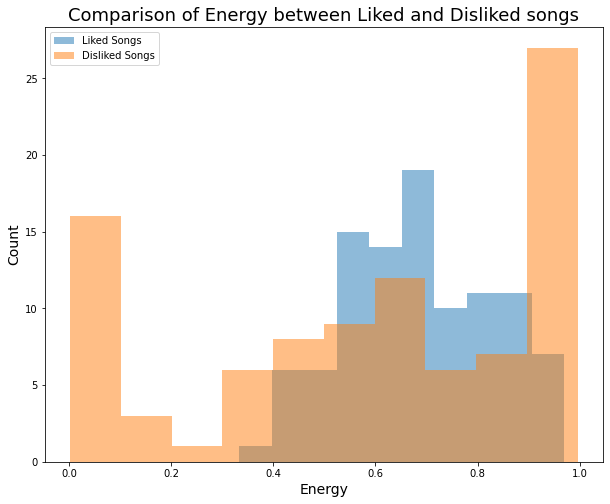

In [25]:
plt.figure(figsize=(10,8))
plt.hist(liked_songs['energy'], alpha=0.5, label='Liked Songs')
plt.hist(disliked_songs['energy'], alpha=0.5, label='Disliked Songs')

plt.xlabel('Energy', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Comparison of Energy between Liked and Disliked songs', fontsize=18)
plt.legend()

<AxesSubplot:title={'center':'Distribution of likes among songs with high speechiness and danceability'}>

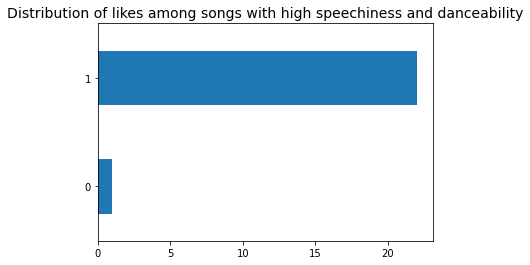

In [29]:
high_speechiness = df['speechiness'] > 0.3
high_danceability = df['danceability'] > 0.6

songs_with_high_dance_and_speech = df[high_speechiness & high_danceability]
plt.title('Distribution of likes among songs with high speechiness and danceability', fontsize=14)
songs_with_high_dance_and_speech['liked'].value_counts().sort_values().plot(kind='barh')

<AxesSubplot:title={'center':'Distribution of likes among songs with low speechiness and danceability'}>

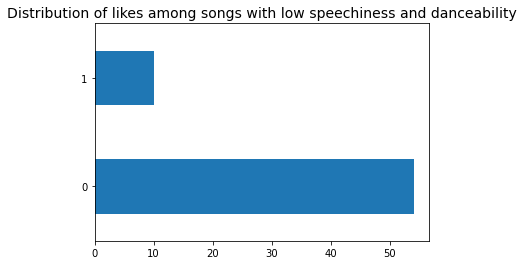

In [30]:
songs_with_low_dance_and_speech = df[~high_speechiness & ~high_danceability]
plt.title('Distribution of likes among songs with low speechiness and danceability', fontsize=14)
songs_with_low_dance_and_speech['liked'].value_counts().plot(kind='barh')

Text(0, 0.5, 'Instrumentalness')

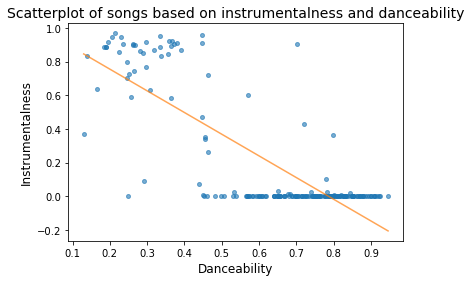

In [36]:
from scipy.stats import linregress

plt.plot(df['danceability'], df['instrumentalness'], 'o', markersize=4, alpha=0.6)

xs = df['danceability']
ys = df['instrumentalness']

res = linregress(xs, ys)

fx = np.array([xs.min(), xs.max()])
fy = res.slope * fx + res.intercept
plt.plot(fx, fy, '-', alpha=0.7)

plt.title('Scatterplot of songs based on instrumentalness and danceability', fontsize=14)
plt.xlabel('Danceability', fontsize=12)
plt.ylabel('Instrumentalness', fontsize=12)


In [37]:
c = df.corr()
c['liked'].sort_values(kind='quicksort')

instrumentalness   -0.569440
duration_ms        -0.490651
acousticness       -0.179375
key                -0.044406
liveness           -0.009797
mode                0.023747
energy              0.176179
time_signature      0.221479
valence             0.268653
tempo               0.371202
loudness            0.410774
danceability        0.569425
speechiness         0.591505
liked               1.000000
Name: liked, dtype: float64

In [38]:
from sklearn.model_selection import train_test_split

x, y = df.drop('liked', axis=1), df['liked']
x.shape, y.shape

((195, 13), (195,))

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
x_train

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
42,0.603,0.886,5,-3.777,0,0.0837,0.000450,0.000000,0.2600,0.395,126.025,229933,4
17,0.745,0.456,8,-9.482,1,0.0874,0.440000,0.000000,0.0720,0.124,94.032,314367,4
5,0.778,0.632,8,-6.415,1,0.1250,0.040400,0.000000,0.0912,0.827,140.951,224029,4
120,0.671,0.584,9,-9.959,0,0.5400,0.650000,0.000000,0.1280,0.366,119.303,209440,5
98,0.764,0.812,7,-4.946,1,0.1790,0.202000,0.000000,0.1260,0.742,139.961,194973,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,0.816,0.667,7,-8.561,1,0.0758,0.235000,0.000000,0.0599,0.402,134.985,85333,3
137,0.456,0.456,11,-16.055,0,0.0535,0.973000,0.353000,0.1860,0.974,144.489,210680,3
72,0.750,0.772,10,-8.706,0,0.1570,0.206000,0.000000,0.0748,0.561,139.980,224496,4
140,0.699,0.610,9,-6.900,1,0.2310,0.001530,0.000002,0.3690,0.577,170.103,204000,4


In [40]:
y_train

42     1
17     0
5      1
120    1
98     1
      ..
133    1
137    0
72     1
140    1
37     0
Name: liked, Length: 136, dtype: int64

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, random_state=1)

In [61]:
predictions = model.predict(x_test)
accuracy_score = metrics.accuracy_score(y_test, predictions)
print('Accuracy of the Random Forest Classifier model: {}%'.format(round(accuracy_score,3)*100))

Accuracy of the Random Forest Classifier model: 98.3%
